In [2]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
from math import pi,sin,cos,acos,asin
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import math
from ml_metrics import rmse,mae
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import minimize
from scipy.optimize import fsolve

In [3]:
def cosd(b):
    return cos(math.radians(b))
def sind(a):
    return sin(math.radians(a))
def tand(f):
    return tan(math.radians(f))
def acosd(d):
    return math.degrees(acos(d))
def asind(c):
    return math.degrees(asin(c))

# SagOfThePan

In [4]:
print(np.cosh(60))

5.710036949078421e+25


In [5]:
pi*(28.11/2)**2

620.5997161079049

In [6]:
#D = H/w*(np.cosh(w*S/(2*H))-1) #sag (m)
#L = 2*H/w*np.sinh(S*w/(2*H)) # (m)
#Slack = L-S#slack (m)
#Da = w*S**2/(8*H)
#print(D,Slack,L)

In [7]:
def sag_slack(s):
    return np.sqrt(3*S**2*s/8)
def ten_slack(s):
    return w*S/2*np.sqrt(S/(6*s*S))

In [8]:
T_o = RTS = 149360 # rate tensile strength (N)
#H = 0.2*RTS #horizontal component of tension (N)
L = 17008/58        # span length (m)
w_o = 18.31 #weight per unit length (N/m)
Al_cs = 484.53*10**(-6)
cs = 547.34*10**(-6)

In [9]:
def T(s):
    return ((w_o*L**2)/(8*s))*(1+8/3*(s/L)**2)

In [10]:
def T_test(s):
    return ((w_o*L**2)/(8*s))*(1+8/3*(s/L)**2)-RTS
fsolve(T_test, [1])

array([1.31776493])

In [11]:
w(1.31776493)
1.31776493

NameError: name 'w' is not defined

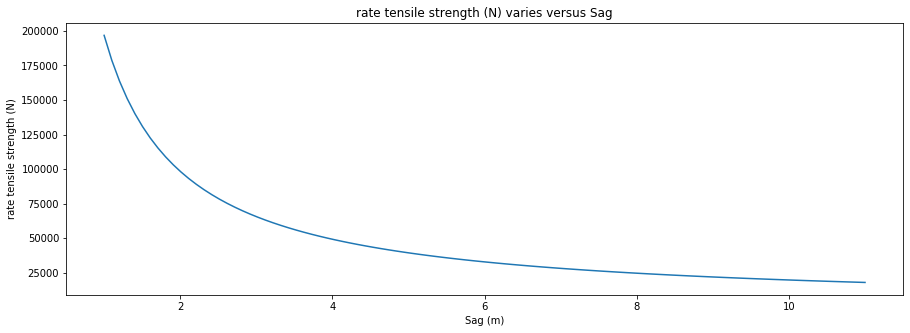

In [12]:
s=np.linspace(1,11,100)
plt.figure(figsize=(15,5))
plt.plot(s,[T(si) for si in s])
plt.ylabel('rate tensile strength (N)')
plt.xlabel('Sag (m)')
plt.title('rate tensile strength (N) varies versus Sag')
plt.show()

In [13]:
def w(s):
    return w_o*(1+8/3*(s/L)**2)

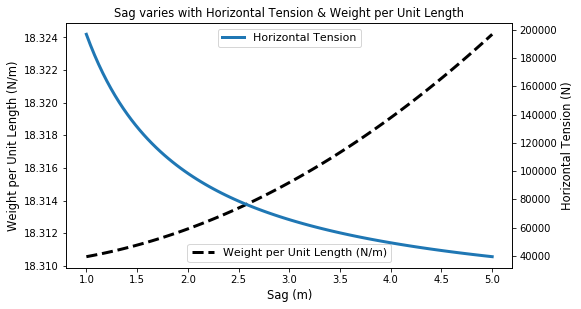

In [23]:
fig,ax = plt.subplots(figsize=(8,4.5))
# make a plot
s=np.linspace(1,5,100)
ax.plot(s,[w(si) for si in s],linewidth=3,label='Weight per Unit Length (N/m)',linestyle='dashed',color='black')
# set x-axis label
ax.set_xlabel("Sag (m)",fontsize=11.5)
# set y-axis label
ax.set_ylabel("Weight per Unit Length (N/m)",fontsize=11.5)
plt.legend(loc='lower center',fontsize=11)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(s,[T(si) for si in s],linewidth=3,label='Horizontal Tension')
#ax2.plot(time_mp,Wd_mp,linewidth=1.5,color='green',label='wind relative angle')
ax2.set_ylabel('Horizontal Tension (N)',fontsize=11.5)
plt.title('Sag varies with Horizontal Tension & Weight per Unit Length',fontsize=11.5)
plt.legend(fontsize=11,loc='upper center')
plt.show()

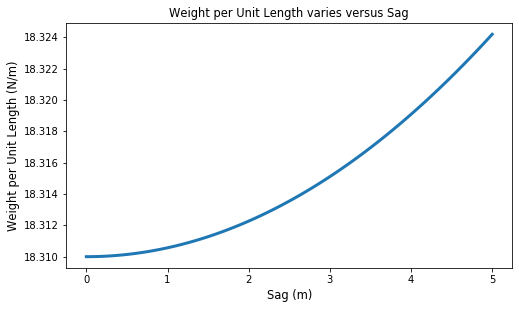

In [24]:
s=np.linspace(0,5,100)
plt.figure(figsize=(8,4.5))
plt.plot(s,[w(si) for si in s],linewidth=3)
plt.ylabel('Weight per Unit Length (N/m)',fontsize=11.5)
plt.xlabel('Sag (m)',fontsize=11.5)
plt.title('Weight per Unit Length varies versus Sag',fontsize=11.5)
plt.show()

In [16]:
def del_temp(s):
    E = 70000/(10**(-6))
    A = 547.34*10**(-6) # cross section
    alpha = 19.5*10**(-6)
    C_o = math.sqrt(E*A/24)
    C = alpha*E*A
    return ((C_o*w(s)*L/T(s))**2-T(s)+T_o-(C_o*w(1.31776493)*L/T_o)**2)/C

In [17]:
    E = 6700/(10**(-6))
    A = 547.34*10**(-6) # cross section
print( math.sqrt(E*A/24))


390.8952331934138


In [18]:
print(fsolve(del_temp, [1]))
1.31776493

[1.31776493]


1.31776493

In [19]:
from sympy import symbols, Eq, solve

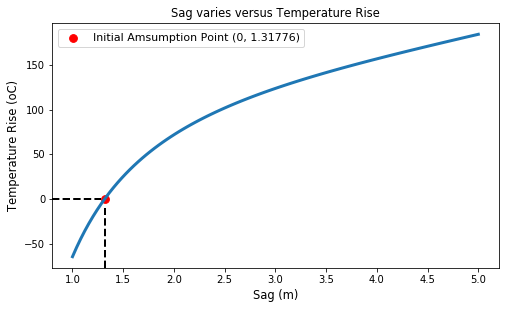

In [27]:
s=np.linspace(1,5,100)
#fig, ax = plt.subplot()
plt.figure(figsize=(8,4.5))
plt.plot(s,[del_temp(si) for si in s],linewidth=3)
plt.ylabel('Temperature Rise (oC)',fontsize=11.5)
plt.xlabel('Sag (m)',fontsize=11.5)
plt.title('Sag varies versus Temperature Rise',fontsize=11.5)
plt.scatter(fsolve(del_temp, [1]), 0, s=60, color = 'red', label='Initial Amsumption Point (0, 1.31776)')
plt.axvline(x=1.31776302, ymin=0, ymax=0.246,color='black',linestyle='dashed',linewidth=2)
plt.axhline(y=0, xmin=0, xmax=0.11,color='black',linestyle='dashed',linewidth=2)
#plt.xticks(ticks=1, labels=None)
plt.legend(fontsize=11)
plt.show()

In [21]:
#p=np.linspace(float(range(0.5,11)))
if (del_temp(k)>0) & (del_temp(k)<4):
    print(solve(del_temp(k)),k)

NameError: name 'k' is not defined

In [ ]:
from scipy.optimize import fsolve
root = fsolve(del_temp, [1])
print(root)
#res = minimize(del_temp(k), [0.2], method='nelder-mead', options={'xtol': 1e-8, 'disp': True})